<h2>En esta primera versión del código se inicia por limpiar los tweets y eliminar los caracteres extraños </h2>

In [4]:
#Autor: Dr. Jose Luis Jimenez Marquez
import pandas as pd
from textblob import TextBlob

ruta = 'Tweets.csv'

df = pd.read_csv(ruta, header=None)
df.columns = ["Fecha", "Tweet","User_location"]
#df.head()
df['Tweet'] = df['Tweet'].str.translate({ord(c): " " for c in "!@#$%^&*,.()""[]{}';:/<>?\|`’~-=_+"})
df['Tweet'] = df['Tweet'].str.replace('\n',' ')
#df.shape
#df.head()

In [15]:
df.head()

,Fecha,Tweet,User_location
0,2020-02-28,coronavirus en mexico🇲🇽 confirmado caso d...,NaN
1,2020-02-28,Se tiene el segundo caso confiado de Covid 19 ...,NaN
2,2020-02-28,mensaje de la jefa de gobierno sobre el coron...,NaN
3,2020-02-28,juliopatan09 Pero ya están prestos a vender ...,NaN
4,2020-02-28,NoHayCubrebocas animal de lopezobrador El...,NaN


<h3>Primero se intentó obtener la puntuación del sentimiento empleando una librería que lo hace para textos en inglés y evaluar el resultado que se obtiene de la misma</h3>

In [ ]:
def sentpol(texto):
    res = TextBlob(texto)
    #blob = TextBlob(w)
    res.translate(from_lang='es', to='en')
    return res.sentiment.polarity

df['Polarity'] = df.apply(lambda row: sentpol(row['Tweet']), axis=1)

<h3>Se realizaron una serie de pruebas encaminadas a observar la puntuación calculada por la libreria</h3>

In [12]:
#res = TextBlob("La epidemia por covid me tiene harta! ya quiero salir de este maldito encierro!!!")
#res = TextBlob("The covid epidemic has me fed up! I already want to get out of this damn confinement bastards")
#res = TextBlob("I am super happy and content, this was very positive")
#res = TextBlob("i am so sad and depressed")
res = TextBlob("i am angry and mad at you")
#res = TextBlob("Estoy súper feliz y contento, esto fue muy positivo")
#res = TextBlob("malo maldito feo ")
#res.translate(from_lang='es', to='en')
print(res.sentiment.polarity)

-0.5625


<h3>Para realizar la traducción de las sentencias, se empleó la librería goslate y después se aplicó la polaridad del sentimiento de TextBlob</h3>

In [18]:
import goslate
gs = goslate.Goslate()
#primary_text = 'Love you a lot '
primary_text = 'malo maldito feo'
texto = gs.translate(primary_text, 'en')
res = TextBlob(texto)
print(res.sentiment.polarity)

-0.6999999999999998


<h3>El inconveniente de emplear este tipo de librerías de traducción es que no pueden resolver todas las peticiones de traducción que se realizan, como se muestra en el siguiente error, donde se indica que ocurrieron diversas solicitudes a la API de traducción</h3>

In [20]:
def sentpol(texto):
    texto2 = gs.translate(texto, 'en')
    #res = TextBlob(texto2)
    #return res.sentiment.polarity
    return texto2

df['Polarity'] = df.apply(lambda row: sentpol(row['Tweet']), axis=1)

HTTPError: HTTP Error 429: Too Many Requests

<h4>En las siguientes dos celdas, se presenta que se intentó realizar la tarea de obtener la puntuación del sentimiento empleando directamente la API de traducción de Google, y otra librería para obtener los puntajes del sentimiento. Sin embargo, este enfoque también es limitado por el bajo número de llamadas que se pueden realizar a la API de traducción</h4>

In [ ]:
#df.head(30)
from googletrans import Translator, constants
#from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj= SentimentIntensityAnalyzer()

translator = Translator()

translation = translator.translate("Esto es muy frustrante y me tiene muy enojada")
print(sid_obj.polarity_scores(translation.text))

In [ ]:
def Vader_sentpol(texto):
    translation = translator.translate(texto)
    translation.text
    
    res = TextBlob(texto)
    #blob = TextBlob(w)
    res.translate(from_lang='es', to='en')
    return res.sentiment.polarity

<h4>Ante la limitante de la API de traducción, se consideró emplear una librería que realizara análisis de sentimientos en español y fue así como se llegó a los siguientes resultados:</h4>

In [1]:
from sentiment_analysis_spanish import sentiment_analysis
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

In [16]:
#print(sentiment.sentiment("te odio!"))
#print(sentiment.sentiment("eres maldito, malo, feo y odioso"))
#print(sentiment.sentiment("eres maldito, peor, malo, feo y odioso"))
#print(sentiment.sentiment("eres bueno, amor, te quiero, te amo, muy bello"))
#print(sentiment.sentiment("son muy buenas opciones para viajar"))

def sentpol(texto):
    return sentiment.sentiment(texto)

df['Polarity'] = df.apply(lambda row: sentpol(row['Tweet']), axis=1)

In [26]:
df.head(50)

,Fecha,Tweet,User_location,Polarity
0,2020-02-28,coronavirus en mexico🇲🇽 confirmado caso d...,NaN,6.794205e-02
1,2020-02-28,Se tiene el segundo caso confiado de Covid 19 ...,NaN,7.744302e-03
2,2020-02-28,mensaje de la jefa de gobierno sobre el coron...,NaN,3.469536e-01
3,2020-02-28,juliopatan09 Pero ya están prestos a vender ...,NaN,3.352698e-04
4,2020-02-28,NoHayCubrebocas animal de lopezobrador El...,NaN,1.398181e-03
5,2020-02-28,Información por parte de una experta del IPN ...,NaN,2.809599e-01
6,2020-02-28,ALMOMENTO Hugo López Gatell subsecretario de...,NaN,1.909846e-02
7,2020-02-28,El 1 2 3 sobre el COVID19 https t co 5Oluj...,NaN,3.952092e-01
8,2020-02-28,Medidas de prevención de COVID 19 Importante...,NaN,3.475781e-01
9,2020-02-28,Y con la llegada del Covid 19 que va a pasar ...,NaN,4.490331e-02


<h3>Una vez obtenido lo anterior, se calcula el promedio diario del sentimiento y se imprime en una gráfica de series de tiempo. El aquí mostrado es sólo una versión de prueba. </h3>

In [24]:
df2 = df[['Fecha', 'Polarity']]
#df2.head()
#df2.shape
df3 = df2.groupby(['Fecha']).mean()

<AxesSubplot:>

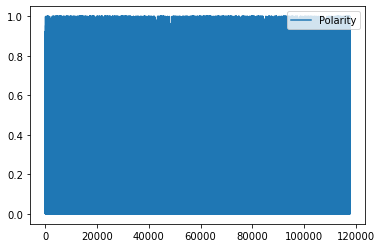

In [30]:
#df2.plot('Fecha', 'Polarity')
df2.plot()


<h4>La librería anterior realiza un buen trabajo en el cálculo del puntaje de sentimiento, no obstante, se exploró una alternativa más robusta con respecto a los datos alcanzados así se llegó a la librería pysentimiento que fue finalmente con la que se ha trabajado.
<BR><BR>Esta librería obtiene una estimación del puntaje de sentimiento y a partir de este, el valor del mismo, por lo que se implementó una función que calculara el puntaje en un rango de -1 a 1, incluyendo aquellos que son neutrales.
<BR><BR>Dicha función se aplica a todos los datos del dataset y considerando el tiempo de ejecución, se decide guardar sólo la fecha del tweet, ubicación del usuario y la Polaridad calculada.
</h4>

In [ ]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")

def getsent(sentscore):
    valor = sentscore.output
    #print(valor)
    if valor == 'POS':
        return sentscore.probas[valor]
    elif valor == 'NEU':
        return sentscore.probas[valor] * .5
    else:
        return sentscore.probas[valor] * -1

def sentpol(texto):
    salida = analyzer.predict(texto)
    return getsent(salida)

df['Polarity'] = df.apply(lambda row: sentpol(row['Tweet']), axis=1)

df1 = df[['Fecha','User_location','Polarity']]
df1.to_csv("C://Tweetsentpol.csv", index=False)